In [134]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sym
import math

In [135]:
x,y=sym.symbols('x y')
f =  2*x**4*y+3*x**4-3*x**2-(2*y**3)/3+y**2

In [136]:
poch_x = sym.diff(f,x)
poch_y = sym.diff(f,y)
poch_x2 = sym.diff(sym.diff(f,x),x)
poch_y2 = sym.diff(sym.diff(f,y),y)
poch_xy = sym.diff(sym.diff(f,y),x)

In [137]:
poch_x

8*x**3*y + 12*x**3 - 6*x

In [138]:
poch_y

2*x**4 - 2*y**2 + 2*y

In [139]:
poch_x2

24*x**2*y + 36*x**2 - 6

In [140]:
poch_y2

2 - 4*y

In [141]:
poch_xy

8*x**3

In [142]:
#ogólny hesjan do którego trzeba wstawiać punkty podejrzane
Hesjan=sym.hessian(f,[x,y])
Hesjan

Matrix([
[24*x**2*y + 36*x**2 - 6,  8*x**3],
[                 8*x**3, 2 - 4*y]])

In [143]:
import sympy.solvers
#zwraca liste punktów podejrzanych o bycie ekstremum
p_podejrzane = sympy.solvers.solve([poch_x,poch_y],[x,y])
p_podejrzane

[(0, 0), (0, 1)]

In [144]:
#do macierzy hesjana podstawiamy punkty podejrzane
hesjany = []
for i in range(0,len(p_podejrzane)):
    hesjany.append(sym.hessian(f, [x, y]).subs([(x,[x for x,y in p_podejrzane][i]), (y,[y for x,y in p_podejrzane][i])]))
hesjany

[Matrix([
 [-6, 0],
 [ 0, 2]]),
 Matrix([
 [-6,  0],
 [ 0, -2]])]

In [145]:
lista_wyz = []
for i in range(0,len(p_podejrzane)):
    lista_wyz.append(hesjany[i].det())
lista_wyz

[-12, 12]

In [146]:
lista_eks=[]
for i in range(0,len(p_podejrzane)):
    if lista_wyz[i] > 0:
        lista_eks.append(p_podejrzane[i]) 
lista_eks

[(0, 1)]

In [147]:
#Następnie należy ustalić czy nasze ekstrema to minima czy maxima
# 1.Liczę drugą pochodną po x
poch_x2 = sym.diff(sym.diff(f,x),x)
# 2.Podstawiam ekstrema
pochx2_p = []
for i in range(0,len(lista_eks)):
    pochx2_p.append(poch_x2.subs([(x,[x for x,y in lista_eks][i]), (y,[y for x,y in lista_eks][i])]))
#3.Jeżeli po podstawieniu ekstremów do pochx2_p wartość < 0 to mamy maxiumum a jak > 0 to minimum   
#maxima
maxima = []
for i in range(0,len(pochx2_p)):
    if pochx2_p[i] < 0:
        maxima.append(lista_eks[i])
#minima        
minima = []
for i in range(0,len(pochx2_p)):
    if pochx2_p[i] > 0:
        minima.append(lista_eks[i])


In [148]:
pochx2_p

[-6]

In [149]:
maxima

[(0, 1)]

In [150]:
minima

[]

In [151]:
lista_p_kryt=[]
for i in range(0,len(p_podejrzane)):
    if lista_wyz[i]<=0:
        lista_p_kryt.append(p_podejrzane[i])
lista_p_kryt

[(0, 0)]

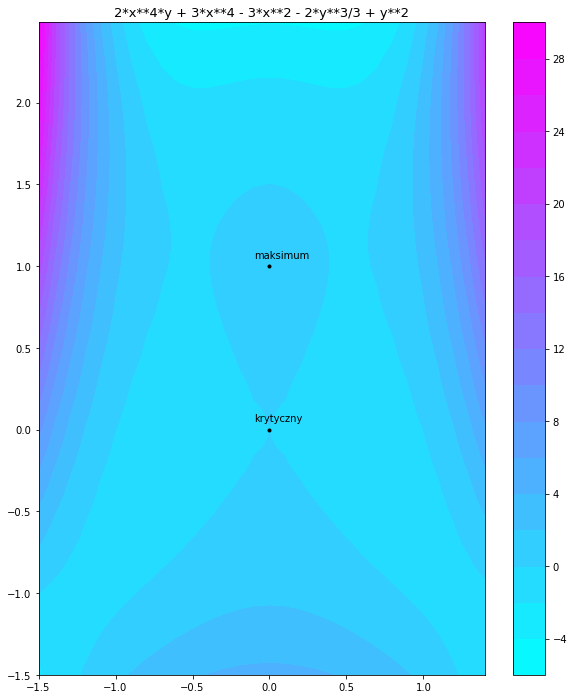

In [152]:
def fun(x,y):
    return  2*x**4*y+3*x**4-3*x**2-(2*y**3)/3+y**2

ax=plt.subplots(figsize=(10,12))

x=np.arange(-1.5,1.5,0.1)
y=np.arange(-1.5,2.5,0.01)

X,Y = np.meshgrid(x,y)
Z = fun(X,Y)

plt.contourf(X,Y,Z,20,cmap='cool')
plt.colorbar()

#ustalanie miejsca dla punktów i adnotacja
plt.scatter([x for x,y in p_podejrzane], [y for x,y in p_podejrzane], color = "black", marker = ".")
#punkty krytyczne
for i in range(0,len(lista_p_kryt)):
    plt.annotate('krytyczny',xy=([x for x,y in lista_p_kryt][i]-0.1, [y for x,y in lista_p_kryt][i]+0.05))
#minima
for i in range(0,len(minima)):
    plt.annotate('minimum', xy=([x for x,y in minima][i]-0.1, [y for x,y in minima][i]+0.05))
#maxima
for i in range(0,len(maxima)):
    plt.annotate('maksimum',xy=([x for x,y in maxima][i]-0.1, [y for x,y in maxima][i]+0.05)) 
    
plt.title(str(f),fontsize = 13)    
plt.savefig('09_mac_273344.jpg')
plt.show()

In [153]:
#Pana F: 2*x**2*y+3*x**4-2*x**2-(2*y**3)/3+y**2
#Moja F: 2*x**4*y+3*x**4-3*x**2-(2*y**3)/3+y**2